In [30]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/', nb_path) 
sys.path.insert(0, nb_path)

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [31]:
!pip install pymysql

In [32]:
import pymysql #cmd에서 pip install PyMySQL로 설치
import json
import hashlib
import time
import random
import threading
from collections import OrderedDict

In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import tensorflow as tf
import string
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout, Flatten, Dense,Softmax, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

import warnings
warnings.filterwarnings(action='ignore')

In [34]:
PATH='/content/mnt/MyDrive/capstone/'

In [35]:
main_db = pymysql.connect(
    user='capstone', 
    passwd='capstone0901', #pw입력
    host='101.101.208.192', 
    db='capstone', 
    charset='utf8'
)
cursor=main_db.cursor(pymysql.cursors.DictCursor)

In [36]:
sql="SELECT * FROM `user`;"
cursor.execute(sql)
result=cursor.fetchall()
userstat=pd.DataFrame(result)
cardsql="SELECT * FROM `card`;"
cursor.execute(cardsql)
result=cursor.fetchall()
cardstat=pd.DataFrame(result)
del result

In [37]:
user_data=userstat[['usernum','totalcnt','answer','similarcnt','totaltellercnt','tellerwin','nontellerwin']].values
del userstat
print(user_data)

[[ 3  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0]
 [11  1  0  0  1  1  0]
 [22  0  0  0  0  0  0]
 [23  0  0  0  0  0  0]
 [24  0  0  0  0  0  0]
 [25  0  0  0  0  0  0]
 [26  0  0  0  0  0  0]
 [27  0  0  0  0  0  0]
 [28  0  0  0  0  0  0]]


In [38]:
card_data=cardstat[['cardno','cardkeyword','usernum']].values
card_data
del cardstat
print(card_data)

[[13 '버섯' 11]
 [1 '캐리비안의 해적' 14]
 [1 '비공정' 14]
 [1 '중국' 14]
 [1 '중동' 14]
 [1 '아라비아' 14]]


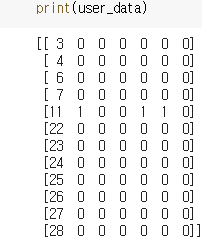
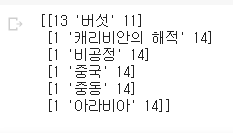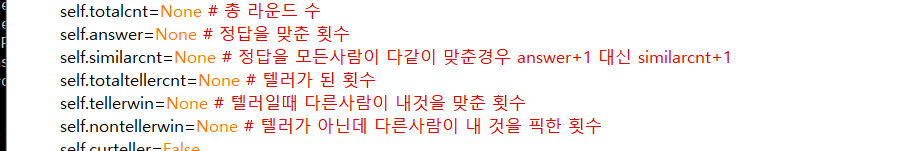